# Clustering for Heart Disease

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys
import warnings
warnings.filterwarnings('ignore')

c:\Anaconda\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Anaconda\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\Eya Kaabachi\AppData\Local\Temp\ipykernel_8240\851023996.py:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `impo

In [2]:
df=pd.read_csv("new_datapfe.csv")
pd.set_option('display.max_columns', None)
df 

,Patient_ID,SEX,MARITAL,EDUCA,WEIGHT2,HEIGHT3,_INCOMG,_BMI5,_AGEG5YR,GENHLTH,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,ALCDAY5,AVEDRNK2,MAXDRNKS,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,DRNKANY5,MENTHLTH,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,ADDEPEV2,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,_MICHD,CHCSCNCR,DIABETE3,SMOKE100,SMOKDAY2,USENOW3,_SMOKER3,_RFSMOK3,PHYSHLTH
0,1,2,1,4,280.0,510.0,2,4018.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,18,310.0,320.0,310.0,305.0,101.0,33.0,67.0,33.0,17.0,100.0,50.0,217.0,2,1,1.0,1.0,1,1.0,1,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,3,1,15.0
1,2,2,2,6,165.0,508.0,1,2509.0,7,3.0,1.0,64.000000,212.0,100.0,69.0,212.0,100.0,0.0,1.0,2.0,0,1,0,1,2,0,305.0,302.0,202.0,202.0,304.0,17.0,7.0,29.0,29.0,13.0,24.0,78.0,2,2,3.0,1.0,1,4.0,2,2.0,2,2.0,2,2.0,2.0,3.0,1.0,1.0,3.0,1,2,0.0
2,3,2,2,4,158.0,511.0,5,2204.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,900,1,99900,1,1,0,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,3.0,1.0,1,1.0,2,1.0,7,2.0,1,2.0,2.0,3.0,2.0,3.0,3.0,4,1,15.0
3,4,2,1,4,180.0,507.0,5,2819.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,30,101.0,555.0,301.0,301.0,201.0,100.0,0.0,3.0,3.0,14.0,100.0,20.0,1,2,1.0,1.0,1,1.0,1,1.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,4,1,30.0
4,5,2,1,5,142.0,504.0,5,2437.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,102.0,203.0,204.0,310.0,320.0,200.0,43.0,57.0,33.0,67.0,100.0,200.0,1,1,3.0,1.0,1,1.0,2,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,4,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,441452,2,3,2,104.0,503.0,2,1842.0,11,4.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,555.0,205.0,555.0,201.0,201.0,0.0,71.0,0.0,14.0,14.0,29.0,200.0,2,2,1.0,1.0,1,1.0,2,1.0,2,2.0,2,2.0,2.0,1.0,2.0,3.0,3.0,4,1,0.0
441452,441453,2,1,5,160.0,503.0,1,2834.0,2,1.0,1.0,64.000000,105.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,202.0,303.0,201.0,202.0,100.0,29.0,10.0,14.0,29.0,117.0,82.0,1,2,3.0,1.0,1,1.0,2,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,4,1,0.0
441453,441454,2,1,4,247.0,505.0,3,4110.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,202.0,2.0,2.0,7,1,93,1,1,20,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,1.0,1.0,1,1.0,2,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,3,1,0.0
441454,441455,1,5,5,166.0,511.0,1,2315.0,7,3.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,101.0,202.0,301.0,301.0,100.0,100.0,29.0,3.0,3.0,200.0,135.0,1,1,1.0,1.0,1,1.0,2,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,4,1,0.0


* CVDINFR4: you had a heart attack, also called a myocardial infarction? 
* CVDCRHD4: you had angina or coronary heart disease? 
* CVDSTRK3: you had a stroke ?
* _MICHD:  have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

In [3]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate target variable from features
X = df.drop('CVDCRHD4', axis=1)
y = df['CVDCRHD4']


In [4]:
# Select top k features using mutual information score
k = 20
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)

SelectKBest(k=20,
            score_func=<function mutual_info_classif at 0x000002114172F1F0>)

In [5]:
# Get selected feature indices and names
selected_features = X.columns[selector.get_support()]
print('Selected features:', selected_features)

Selected features: Index(['SEX', 'EXERANY2', '_RFDRHV5', '_FRTLT1', '_VEGLT1', 'BPHIGH4',
       'BPMEDS', 'BLOODCHO', 'ADDEPEV2', 'TOLDHI2', 'CVDINFR4', 'CVDSTRK3',
       '_MICHD', 'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3',
       '_SMOKER3', '_RFSMOK3'],
      dtype='object')


KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10, random_state=42),
                 k=(1, 11))

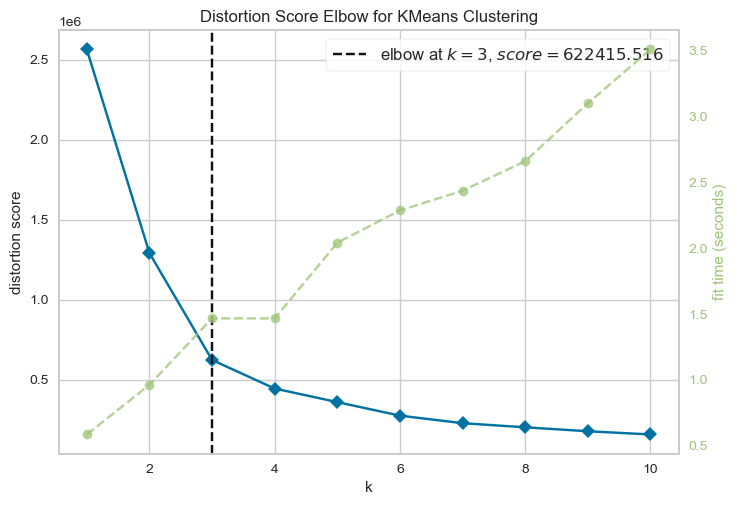

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
#features = ['Patient_ID', 'WEIGHT2', 'HEIGHT3', '_BMI5', '_AGEG5YR', 'GENHLTH',
#       '_DRNKWEK', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1',
#       'BEANDAY_', 'GRENDAY_', 'ORNGDAY_', 'VEGEDA1_', '_FRUTSUM', '_VEGESUM',
#       'BPHIGH4', 'PHYSHLTH','CVDINFR4']
features = ['SEX', 'EXERANY2', '_RFDRHV5', '_FRTLT1', '_VEGLT1', 'BPHIGH4',
       'BPMEDS', 'BLOODCHO', 'ADDEPEV2', 'TOLDHI2', 'CVDINFR4', 'CVDSTRK3',
       '_MICHD', 'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3',
       '_SMOKER3', '_RFSMOK3','CVDCRHD4']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1, 11))

# Fit the data to the visualizer
visualizer.fit(df_pca)

# Visualize the elbow curve
visualizer.show()

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Behavioral Segmentation Clustering')

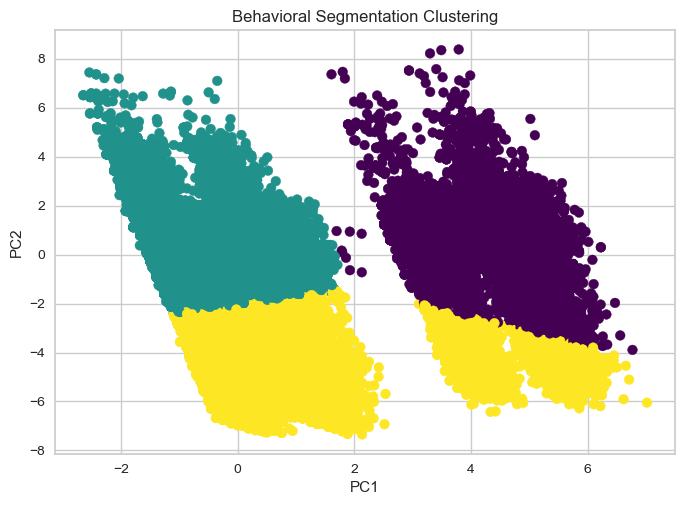

In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmodel = kmeans.fit_predict(df_pca)

# Visualize the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmodel, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Behavioral Segmentation Clustering')
plt.show()

In [8]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

for i in range(kmeans.n_clusters):
    cluster = clustered_data.loc[clustered_data['cluster'] == i]
    profile = ProfileReport(cluster, title=f"Cluster {i} Profile Report", explorative=True)
    profile.to_file(f"Heart_clustering_{i}_profile.html")

Cluster Sizes:
Cluster 0: 58237
Cluster 1: 348565
Cluster 2: 34654

Cluster Means:
              SEX  EXERANY2  _RFDRHV5   _FRTLT1   _VEGLT1   BPHIGH4    BPMEDS  \
cluster                                                                         
0        1.533870  1.340728  1.108230  1.477171  1.248828  2.275461  1.098528   
1        1.595215  1.215331  1.042649  1.315204  1.168273  2.258245  1.060577   
2        1.460437  1.361978  1.025856  1.354072  1.220263  1.424713  1.057136   

         BLOODCHO  ADDEPEV2   TOLDHI2  CVDINFR4  CVDSTRK3    _MICHD  CHCSCNCR  \
cluster                                                                         
0        1.369576  1.692704  1.685561  1.989886  1.975703  1.951491  1.945979   
1        1.235090  1.838564  1.663664  2.019684  1.984433  1.994833  1.908361   
2        1.054251  1.722370  1.295233  1.378023  1.835575  1.018670  1.807006   

         DIABETE3  SMOKE100  SMOKDAY2   USENOW3  _SMOKER3  _RFSMOK3  CVDCRHD4  
cluster                  

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cluster_labels = kmeans.labels_
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(daf.drop('CVDINFR4', axis=1), cluster_labels, test_size=0.2, random_state=42)

# Train a classifier on the training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate accuracy of predictions
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

DecisionTreeClassifier(random_state=42)

Accuracy: 0.9977461151633217


In [6]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#kmeans_silhouette = silhouette_score(daf, kmodel)
kmeans_calinski = calinski_harabasz_score(daf, kmodel)
kmeans_davies = davies_bouldin_score(daf, kmodel)

#print("KMeans - Silhouette Coefficient: ", kmeans_silhouette)
print("KMeans - Calinski-Harabasz Index: ", kmeans_calinski)
print("KMeans - Davies-Bouldin Index: ", kmeans_davies)

KMeans - Calinski-Harabasz Index:  42656.92537914977
KMeans - Davies-Bouldin Index:  2.034382444725976


### Disease risk prediction:

In [9]:
# Split data into features (X) and target variable (y)
X = daf.drop('CVDCRHD4', axis=1)
y = daf['CVDCRHD4']



In [10]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from catboost import CatBoostClassifier
# Define the hyperparameters for the CatBoost algorithm
params = {'learning_rate': 0.1, 'depth': 6,\
          'l2_leaf_reg': 3, 'iterations': 100}
  
# Initialize the CatBoostClassifier object 
# with the defined hyperparameters and fit it on the training set
model_catb = CatBoostClassifier(**params)
model_catb.fit(X_train, y_train)

0:	learn: 0.3499783	total: 169ms	remaining: 16.7s
1:	learn: 0.1750747	total: 196ms	remaining: 9.62s
2:	learn: 0.1047085	total: 219ms	remaining: 7.07s
3:	learn: 0.0698166	total: 242ms	remaining: 5.8s
4:	learn: 0.0547331	total: 263ms	remaining: 5.01s
5:	learn: 0.0474960	total: 291ms	remaining: 4.55s
6:	learn: 0.0437701	total: 316ms	remaining: 4.2s
7:	learn: 0.0432905	total: 340ms	remaining: 3.91s
8:	learn: 0.0428763	total: 366ms	remaining: 3.7s
9:	learn: 0.0425698	total: 392ms	remaining: 3.53s
10:	learn: 0.0411334	total: 419ms	remaining: 3.39s
11:	learn: 0.0409726	total: 444ms	remaining: 3.26s
12:	learn: 0.0408376	total: 471ms	remaining: 3.15s
13:	learn: 0.0407421	total: 495ms	remaining: 3.04s
14:	learn: 0.0400260	total: 526ms	remaining: 2.98s
15:	learn: 0.0399614	total: 550ms	remaining: 2.88s
16:	learn: 0.0399127	total: 573ms	remaining: 2.8s
17:	learn: 0.0398521	total: 598ms	remaining: 2.72s
18:	learn: 0.0398122	total: 620ms	remaining: 2.64s
19:	learn: 0.0394451	total: 645ms	remaining: 

In [12]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
# Predict the target variable on the validation
# set and evaluate the performance
catboost_md = model_catb.predict(X_test)
# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy = model_catb.score(X_test, y_test)
precision = precision_score(y_test, catboost_md,average = 'macro')
recall = recall_score(y_test, catboost_md,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
# Classification Report of logreg_cv
print(classification_report(catboost_md, y_test))

Accuracy: 0.9772799347619263
Precision: 0.89117804350662
Recall: 0.896500945266031
              precision    recall  f1-score   support

         1.0       0.81      0.79      0.80      5043
         2.0       0.99      0.99      0.99     83249

    accuracy                           0.98     88292
   macro avg       0.90      0.89      0.89     88292
weighted avg       0.98      0.98      0.98     88292



In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.model_selection import learning_curve

In [14]:
def plot_confusion_matrix(y_test, y_predict, color, title):
    """
    Confusion matrix to evaluate the accuracy of Models
    """
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color)
    plt.title(title)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.tight_layout()
    plt.show()

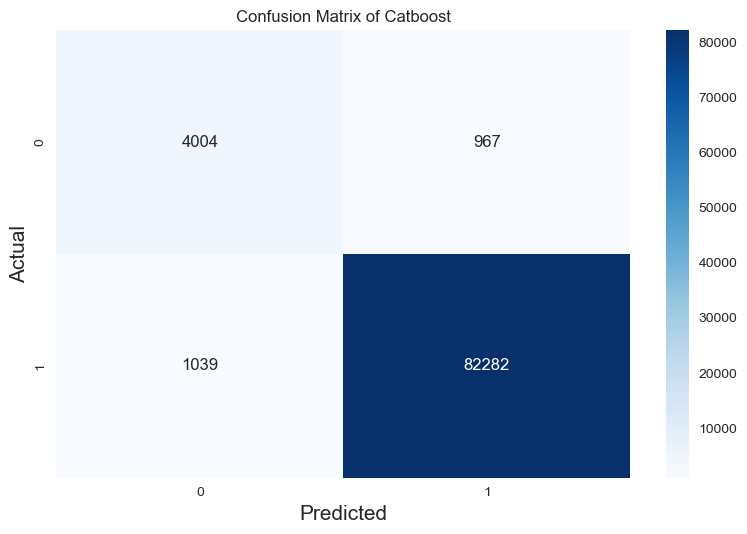

In [15]:
# Catboost model
title = 'Confusion Matrix of Catboost'
plot_confusion_matrix(y_test, catboost_md, 'Blues', title);

In [16]:
def plot_learning_curve(model, title, X, y, ylim=None, cv=5, n_jobs=4, 
                        train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Draw the training and GridSearchCV testing learning curves
    """
    plt.figure(figsize=(10, 7))
    plt.title(title, fontsize=20)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Number of training samples', fontsize=15)
    plt.ylabel('Score', fontsize=15)
    plt.tick_params(labelsize=14)
    
    # Get training and test scores along with train_sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, 
                                                            cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    
    # Calculate mean and standard deviation of training and test data
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(color='gray',linestyle='-')
    
    # Plot the learning curves
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='r')
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='g')
   
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return plt

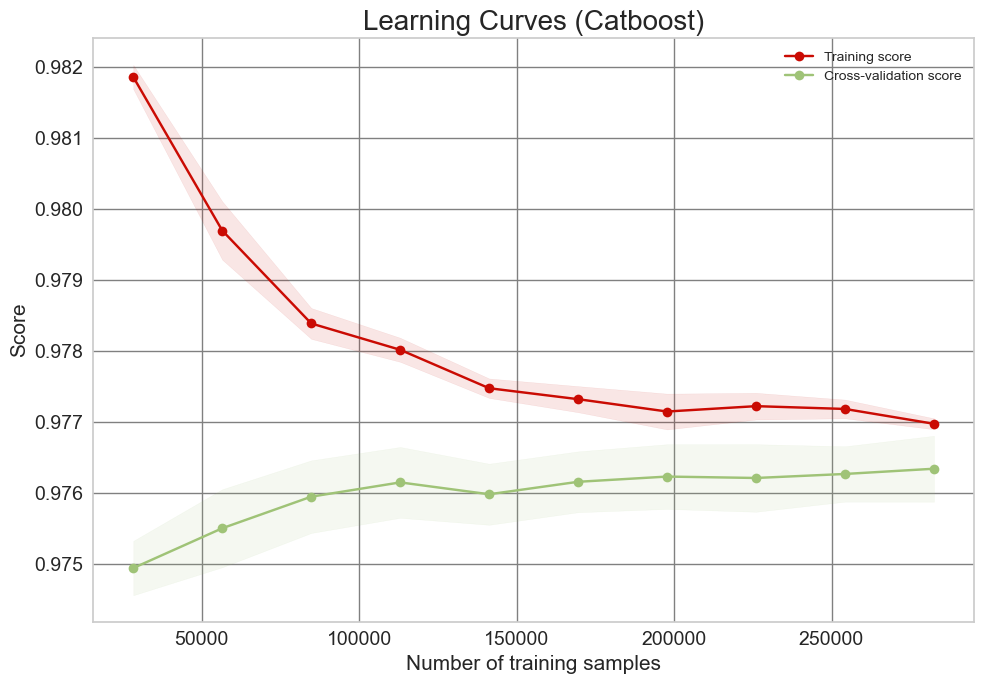

In [17]:
# Learning curve for Catboost Models
title = 'Learning Curves (Catboost)'
plot_learning_curve(model_catb, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=10, train_sizes=np.linspace(0.1, 1.0, 10));

In [40]:
# Randomly choose new individuals from the dataset
num_new_individuals = 3  # Specify the desired number of new individuals
new_individuals = daf.sample(n=num_new_individuals, replace=True)

# Generate random numbers for each column based on the dataset column values
for column in new_individuals.columns:
    if column != 'cluster':  # Skip the 'cluster' column
        unique_values = daf[column].unique()
        new_individuals[column] = np.random.choice(unique_values, size=num_new_individuals)
new_individuals.drop(['CVDCRHD4'],axis=1,inplace=True)
# Print the generated new individuals
print(new_individuals)

# Predict the health outcomes for new individuals
predicted_outcomes = model_catb.predict(new_individuals)
predicted_outcomes= predicted_outcomes.flatten().tolist()
print(predicted_outcomes)

        SEX  EXERANY2  _RFDRHV5  _FRTLT1  _VEGLT1  BPHIGH4  BPMEDS  BLOODCHO  \
247204    2       2.0         1        1        2      1.0     2.0         1   
83181     2       1.0         1        2        1      3.0     2.0         2   
345015    2       1.0         2        2        2      4.0     1.0         7   

        ADDEPEV2  TOLDHI2  CVDINFR4  CVDSTRK3  _MICHD  CHCSCNCR  DIABETE3  \
247204         1      2.0         1         1     1.0       1.0       4.0   
83181          1      2.0         7         2     2.0       2.0       1.0   
345015         2      2.0         2         1     1.0       1.0       3.0   

        SMOKE100  SMOKDAY2  USENOW3  _SMOKER3  _RFSMOK3  
247204       2.0       2.0      2.0         3         1  
83181        1.0       3.0      3.0         4         2  
345015       2.0       3.0      1.0         4         2  
[2.0, 2.0, 1.0]


In [41]:
# Define the personalized doctor recommendations for each segment

recommendations = {
    0: "Quit smoking, limit alcohol consumption and try to stay healthy to avoid getting diabetes.",
    1: "Congratulations, the patient is healthy.",
    2: "Patient is at risk! Please visit a specialist!",
}


# Provide personalized doctor recommendations for each new individual
for segment in predicted_outcomes:
    if segment in recommendations:
        recommendation = recommendations[segment]
        print("Recommendation for patient {}: {}".format(segment, recommendation))
    else:
        print("No specific recommendation available for patient {}".format(segment))

Recommendation for patient 2.0: Patient is at risk! Please visit a specialist!
Recommendation for patient 2.0: Patient is at risk! Please visit a specialist!
Recommendation for patient 1.0: Congratulations, the patient is healthy.


In [20]:
doc_df=pd.read_csv("healthcare_docs.csv")
doc_df.rename(columns={'CredentialType': 'Specialty'},inplace=True)
doc_df['FullName'] = doc_df['LastName'].str.cat(doc_df['FirstName'], sep=' ')
doc_df.drop(["LastName","FirstName"],axis=1,inplace=True)
filtered_doc_df = doc_df.copy()  # Create a copy of the DataFrame to avoid modifying the original data

# Iterate over the DataFrame and drop rows containing "Nurse" or "Pharmacy" in the "Specialty" column
for index, row in doc_df.iterrows():
    if ("Nurse" in row['Specialty']) or ("Pharmacy" in row['Specialty']) or ("Nursing" in row['Specialty']) or ("Dental" in row['Specialty']):
        filtered_doc_df.drop(index, inplace=True)

# Reset the index of the filtered DataFrame
filtered_doc_df.reset_index(drop=True, inplace=True)

doc_df = filtered_doc_df
doc_df

,Specialty,FullName
0,Medical Assistant Phlebotomist Certification,De La Cruz Alexandra
1,Substance Use Disorder Professional Trainee Ce...,Sullivan Jana
2,Physician and Surgeon License Interstate Medic...,Fleming III Dallas
3,Emergency Medical Technician Certification,Siegert Ty
4,Medical Assistant Certification,Ganiron Gayle
...,...,...
949,Medical Program Director Delegate,Lonner Joseph
950,Medical Assistant Certification,Carbajal Avila Susana
951,Emergency Medical Technician Certification,Hampton Kristopher
952,Medical Assistant Phlebotomist Certification,Boparai Sarbjit


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

specialties = doc_df['Specialty'].fillna('').astype(str).tolist()  # Convert to list of strings

# Compute TF-IDF scores for the specialties
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(specialties)

# Convert predicted_outcomes to a list of strings
predicted_outcomes = [str(outcome) for outcome in predicted_outcomes]

# Compute the TF-IDF vector for each patient's predicted disease or risk category
patient_tfidf = tfidf_vectorizer.transform(predicted_outcomes)

# Calculate cosine similarity between each patient's TF-IDF vector and all doctors' TF-IDF vectors
similarity_scores = cosine_similarity(patient_tfidf, tfidf_matrix)

# Retrieve top N doctors based on similarity scores for each patient
top_n = 10 # Number of recommendations to retrieve

# Print the recommended doctors for each patient, only if there is a predicted risk
print("Recommended Doctors:")
for i in range(len(new_individuals)):
    patient = new_individuals.iloc[i]
    if predicted_outcomes[i] == "2.0":  # Check if there is a predicted risk
        patient_similarity_scores = similarity_scores[i]
        top_indices = patient_similarity_scores.argsort()[-top_n:][::-1]  # Indices of top recommendations

        print(f"Recommendations for Patient {i+1}:")
        for index in top_indices:
            doctor = doc_df.iloc[index]
            if "medical" in doctor['Specialty'].lower() or "physical" in doctor['Specialty'].lower() or "physician" in doctor['Specialty'].lower():
                print(f"- {doctor['FullName']}, Specialty: {doctor['Specialty']}")
    else:
        print(f"No recommendations for Patient {i+1} as there is no predicted risk.")
    print()

Recommended Doctors:
Recommendations for Patient 1:
- James Bryan, Specialty: Medical Assistant Registration
- Enache Catalina, Specialty: Medical Assistant Phlebotomist Certification
- Wirkkala Hilary, Specialty: Physical Therapist License
- Kouhi Leila, Specialty: Medical Assistant Interim Certification
- Kinsman Kirsten, Specialty: Physician And Surgeon License
- Baughman Baillie, Specialty: Medical Assistant Registration

Recommendations for Patient 2:
- James Bryan, Specialty: Medical Assistant Registration
- Enache Catalina, Specialty: Medical Assistant Phlebotomist Certification
- Wirkkala Hilary, Specialty: Physical Therapist License
- Kouhi Leila, Specialty: Medical Assistant Interim Certification
- Kinsman Kirsten, Specialty: Physician And Surgeon License
- Baughman Baillie, Specialty: Medical Assistant Registration

No recommendations for Patient 3 as there is no predicted risk.

